# 第一题：使用sklearn的DBSCAN和GaussianMixture完成聚类

实验内容：
1. 使用sklearn的DBSCAN和GaussianMixture在两个数据集上完成聚类任务
2. 对聚类结果可视化
3. 对比外部指标FMI和NMI
4. 选做：调整密度聚类的eps参数，绘制聚类结果

**注意：在运行本notebook前请将sklearn更新至最新版！**

# 1. 导入模块

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 2. 生成数据集

In [2]:
from sklearn import datasets
X1, y1 = datasets.make_circles(n_samples = 1500, factor = 0.5, noise = 0.05, random_state = 32)
X2, y2 = datasets.make_moons(n_samples = 1500, noise = 0.05, random_state = 32)

In [3]:
colors = np.array(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00'])

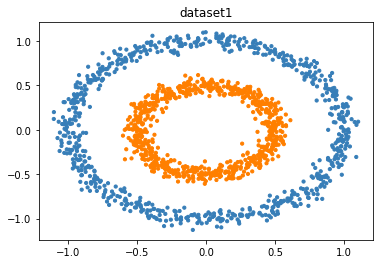

In [4]:
plt.title('dataset1')
plt.scatter(X1[:, 0], X1[:, 1], s = 10, c = colors[y1])

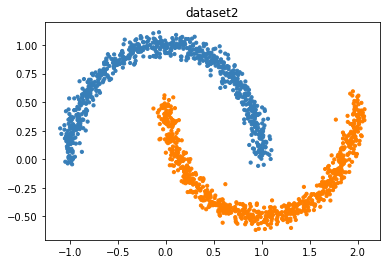

In [5]:
plt.title('dataset2')
plt.scatter(X2[:, 0], X2[:, 1], s = 10, c = colors[y2])

# 3. 导入模型

我们导入密度聚类和高斯混合模型两个模型

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# 4. 训练模型

In [7]:
dbscan = DBSCAN(eps = 0.1)
dbscan.fit(X1)

DBSCAN(eps=0.1)

密度聚类模型使用模型的`labels_`属性就可以获得聚类后的类标记

In [8]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 1])

In [9]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X1)

GaussianMixture(n_components=2)

高斯混合模型需要使用predict函数预测类标记

In [10]:
gmm.predict(X1)

array([1, 0, 0, ..., 0, 0, 0])

# 5. 聚类结果可视化

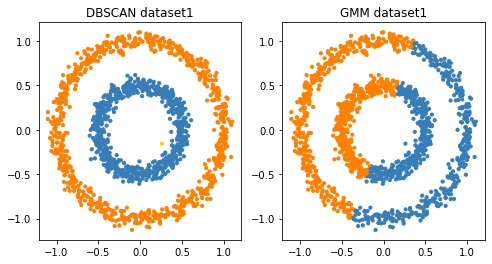

In [11]:
plt.figure(figsize = (8, 4))
plt.subplot(121)
plt.title('DBSCAN dataset1')
plt.scatter(X1[:, 0], X1[:, 1], s = 10, c = colors[dbscan.labels_])

plt.subplot(122)
plt.title('GMM dataset1')
plt.scatter(X1[:, 0], X1[:, 1], s = 10, c = colors[gmm.predict(X1)])

从可视化效果可以看出，密度聚类比高斯混合聚类在**这个数据集**上表现的更好一些

## 6. 指标计算

我们这里选用两个外部指标，FMI和NMI。

互信息(mutual information)表示了两个分布的一致程度。归一化的互信息(NMI)将互信息值映射到0到1的空间内。值越高，说明两个分布的一致性越高。

FMI是Fowlkes-Mallows index，使用precision和recall计算得到，其值域也是0到1，越大说明聚类效果越和参考模型相近。

In [12]:
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score

In [13]:
normalized_mutual_info_score(y1, dbscan.labels_)

0.9963492171846003

In [14]:
normalized_mutual_info_score(y1, gmm.predict(X1))

4.6173882245303024e-05

In [15]:
fowlkes_mallows_score(y1, dbscan.labels_)

0.9993331109628394

In [16]:
fowlkes_mallows_score(y1, gmm.predict(X1))

0.49939300378997464

从外部指标上看，密度聚类在这个数据集上比高斯混合模型更好。

# Test

请你使用密度聚类和高斯混合模型在数据集X2上进行聚类，绘制聚类后的效果。计算FMI和NMI值，填入下标

###### 双击此处填写

算法|FMI|NMI
-|-|-
密度聚类|0.9986675591186284|0.9933830644666388
高斯混合模型|0.7474721941402278|0.3951934639969314

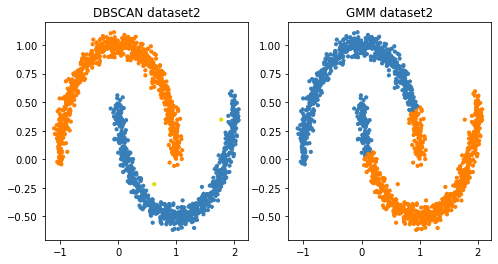

In [35]:
# YOUR CODE HERE
# 训练模型
dbscan = DBSCAN(eps = 0.1)
dbscan.fit(X2)

gmm = GaussianMixture(n_components=2)
gmm.fit(X2)

# 可视化
plt.figure(figsize = (8, 4))
plt.subplot(121)
plt.title('DBSCAN dataset2')
plt.scatter(X2[:, 0], X2[:, 1], s = 10, c = colors[dbscan.labels_])

plt.subplot(122)
plt.title('GMM dataset2')
plt.scatter(X2[:, 0], X2[:, 1], s = 10, c = colors[gmm.predict(X2)])


In [36]:
print("密度聚类NMI", normalized_mutual_info_score(y2,dbscan.labels_))
print("高斯混合模型NMI", normalized_mutual_info_score(y2, gmm.predict(X2)))
print("密度聚类FMI",fowlkes_mallows_score(y2, dbscan.labels_))
print("高斯混合模型FMI", fowlkes_mallows_score(y2, gmm.predict(X2)))

密度聚类NMI 0.9933830644666379
高斯混合模型NMI 0.3951934639969313
密度聚类FMI 0.9986675591186284
高斯混合模型FMI 0.7474721941402278


# 选做：尝试调整密度聚类的eps的值，绘制聚类结果

In [ ]:
# YOUR CODE HERE













